<a href="https://colab.research.google.com/github/lukinhasxxx/Poke_Data_Analysis_2020/blob/main/Projeto_BCC_pok%C3%A9mon_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

poke = pd.read_csv('http://professor.ufabc.edu.br/~ronaldo.prati/bases/Pokemon_sim.csv', sep=',' )

In [ ]:
#Cria uma tabela que exibe em ordem crescente a lista de pokémons com menor quantidade de atributos totais e suas respectivas vitorias e derrotas
#com exceção dos lendários
maiorTotal = poke.sort_values(by=['Total'])
maiorTotal = maiorTotal.loc[maiorTotal['Legendary'] == 0]
maiorTotal = maiorTotal[['Name','Total','Legendary','vitorias','derrotas','% vitorias', '% derrotas']]
maiorTotal

,Name,Total,Legendary,vitorias,derrotas,% vitorias,% derrotas
182,Sunkern,180,False,3287.0,74313.0,4.235825,95.764175
285,Azurill,190,False,3395.0,74163.0,4.375000,95.570876
387,Kricketot,194,False,3368.0,74232.0,4.340206,95.659794
9,Caterpie,195,False,3835.0,73765.0,4.942010,95.057990
254,Wurmple,195,False,5267.0,72333.0,6.787371,93.212629
...,...,...,...,...,...,...,...
363,Metagross,600,False,69886.0,7714.0,90.059278,9.940722
429,Garchomp,600,False,72248.0,5352.0,93.103093,6.896907
360,Salamence,600,False,68718.0,8882.0,88.554124,11.445876
473,Manaphy,600,False,65985.0,11615.0,85.032216,14.967784


In [ ]:
#10 Pokémons com menor taxa de vitória
poke.sort_values(by=['% vitorias']).head(10)

In [ ]:
#Número de pokemons por geração
geracoes = poke.groupby("Generation").count()
print(geracoes, "No total de",  geracoes.sum(),"pokémons")

            Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
Generation                                                               
1            143     143      64    143  143     143      143      143   
2             98      98      48     98   98      98       98       98   
3            132     132      66    132  132     132      132      132   
4            103     103      50    103  103     103      103      103   
5            149     149      70    149  149     149      149      149   
6             64      64      36     64   64      64       64       64   

            Sp. Def  Speed  Legendary  vitorias  derrotas  empates  \
Generation                                                           
1               143    143        143       143       143      143   
2                98     98         98        98        98       98   
3               132    132        132       132       132      132   
4               103    103        103       103       103

In [ ]:
#Preenchimento da coluna do tipo 2 vazias pela cópia do tipo 1
poke['Type 2'].fillna(poke['Type 1'], inplace=True)

In [ ]:
#Total de pokemons lendários
lendario=poke.loc[poke['Legendary'] == True]
print (lendario,"Existem",poke["Legendary"].sum(),"pokémons lendários")

          Name    Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
135   Articuno       Ice    Flying    580   90      85      100       95   
136     Zapdos  Electric    Flying    580   90      90       85      125   
137    Moltres      Fire    Flying    580   90     100       90      125   
141     Mewtwo   Psychic   Psychic    680  106     110       90      154   
233     Raikou  Electric  Electric    580   90      85       75      115   
234      Entei      Fire      Fire    580  115     115       85       90   
235    Suicune     Water     Water    580  100      75      115       90   
239      Lugia   Psychic    Flying    680  106      90      130       90   
364   Regirock      Rock      Rock    580   80     100      200       50   
365     Regice       Ice       Ice    580   80      50      100      100   
366  Registeel     Steel     Steel    580   80      75      150       75   
367     Latias    Dragon   Psychic    600   80      80       90      110   
368     Lati

In [ ]:
#10 pokémons com maior taxa de vitória (independente da geração)
vitoria=poke.sort_values(by=["% vitorias"] ,ascending=[False])
vitoria.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank
685,Xerneas,Fairy,Fairy,680,126,131,95,131,98,99,...,True,76688.0,912.0,0.0,5.980206,77600.0,98.824742,1.175258,0.000000,0.987329
686,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,True,76623.0,977.0,0.0,5.836237,77600.0,98.740979,1.259021,0.000000,0.986460
371,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,...,True,75642.0,1958.0,0.0,5.695322,77600.0,97.476804,2.523196,0.000000,0.973440
369,Kyogre,Water,Water,670,100,100,90,150,140,90,...,True,75034.0,2566.0,0.0,5.631095,77600.0,96.693299,3.306701,0.000000,0.965422
621,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,...,True,74935.0,2665.0,0.0,6.792990,77600.0,96.565722,3.434278,0.000000,0.964119
471,Cresselia,Psychic,Psychic,600,120,70,120,75,130,85,...,False,74877.0,2723.0,0.0,10.046302,77600.0,96.490979,3.509021,0.000000,0.963356
467,Dialga,Steel,Dragon,680,100,120,120,150,100,90,...,True,74863.0,2737.0,0.0,6.914330,77600.0,96.472938,3.527062,0.000000,0.963171
622,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,...,True,74708.0,2892.0,0.0,6.971559,77600.0,96.273196,3.726804,0.000000,0.961133
470,Regigigas,Normal,Normal,670,110,160,110,80,110,100,...,True,73892.0,3647.0,61.0,7.447539,77600.0,95.221649,4.699742,0.078608,0.951180
623,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,...,True,73835.0,3764.0,1.0,8.243814,77600.0,95.148196,4.850515,0.001289,0.949683


In [ ]:
#10 pokémons com maior taxa de vitória para cada geração (digitados por input)
escreverGeracao = int(input('Digite a geração para consulta: \n'))
vitoria1=poke.sort_values(by=["% vitorias"],ascending=False)
vitoriaGen=vitoria1[poke['Generation']== escreverGeracao]
vitoriaGen.head(10)

Digite a geração para consulta: 
3


<ipython-input-12-dc65c2d33f13>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vitoriaGen=vitoria1[poke['Generation']== escreverGeracao]


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank
371,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,...,True,75642.0,1958.0,0.0,5.695322,77600.0,97.476804,2.523196,0.000000,0.973440
369,Kyogre,Water,NaN,670,100,100,90,150,140,90,...,True,75034.0,2566.0,0.0,5.631095,77600.0,96.693299,3.306701,0.000000,0.965422
370,Groudon,Ground,NaN,670,100,150,140,100,90,90,...,True,73562.0,4038.0,0.0,6.094394,77600.0,94.796392,5.203608,0.000000,0.946092
363,Metagross,Steel,Psychic,600,80,135,130,95,90,70,...,False,69886.0,7714.0,0.0,7.720374,77600.0,90.059278,9.940722,0.000000,0.898079
372,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,...,True,69680.0,7920.0,0.0,8.868518,77600.0,89.793814,10.206186,0.000000,0.895395
366,Registeel,Steel,NaN,580,80,75,150,75,150,50,...,True,69584.0,8015.0,1.0,10.195258,77600.0,89.670103,10.328608,0.001289,0.894156
360,Salamence,Dragon,Flying,600,95,135,80,110,80,100,...,False,68718.0,8882.0,0.0,7.863647,77600.0,88.554124,11.445876,0.000000,0.882868
364,Regirock,Rock,NaN,580,80,100,200,50,100,50,...,True,67969.0,9627.0,4.0,8.714652,77600.0,87.588918,12.405928,0.005155,0.873167
276,Slaking,Normal,NaN,670,150,160,100,95,65,100,...,False,65026.0,12197.0,377.0,12.875090,77600.0,83.796392,15.717784,0.485825,0.838989
368,Latios,Dragon,Psychic,600,80,90,80,130,110,110,...,True,64431.0,13168.0,1.0,8.815425,77600.0,83.029639,16.969072,0.001289,0.827160


In [ ]:
#Exibe os 5 pokémons que possuem maior derrota por cada geração digitada
genDigitada = int(input("Digite o número da geração para ver os com mais derrotas"))
poke.loc[poke['Generation'] == genDigitada].sort_values(by=["derrotas"], ascending=[False]).head(5)

Digite o número da geração para ver os com mais derrotas2


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank
163,Pichu,Electric,Electric,205,20,40,15,35,35,60,...,False,907.0,76693.0,0.0,2.512603,77600.0,1.168814,98.831186,0.000000,0.010809
226,Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,...,False,1415.0,76185.0,0.0,4.672861,77600.0,1.823454,98.176546,0.000000,0.017135
204,Shuckle,Bug,Rock,505,20,10,230,10,230,5,...,False,2590.0,74948.0,62.0,11.483054,77600.0,3.337629,96.582474,0.079897,0.031920
182,Sunkern,Grass,Grass,180,30,30,30,30,30,30,...,False,3287.0,74313.0,0.0,3.814214,77600.0,4.235825,95.764175,0.000000,0.040694
165,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,...,False,3436.0,73878.0,286.0,6.231495,77600.0,4.427835,95.203608,0.368557,0.042735


In [ ]:
#Procurar pokémons com a maior taxa de vitória de algum elemento específico
escreverElemento = input('Escreva o elemento para ser procurado, por exemplo Ice, Grass, Normal etc.')
TesteType= poke.sort_values(by=["vitorias"], ascending= [False])
elementoVitorias= TesteType[poke['Type 1']==escreverElemento]
elementoVitorias


Escreva o elemento para ser procurado, por exemplo Ice, Grass, Normal etc.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank


In [ ]:
#Combinações de elementos com o maior ataque, vitória, derrota etc.
combMaxAtk = poke.groupby(['Name','Type 1', 'Type 2']).max().loc[:, 'Attack']
combMaxAtk.reset_index().sort_values('Attack', ascending=False).head(10)

,Name,Type 1,Type 2,Attack
331,Zekrom,Dragon,Electric,150
225,Rayquaza,Dragon,Flying,150
230,Rhyperior,Ground,Rock,140
8,Archeops,Rock,Flying,140
83,Excadrill,Ground,Steel,135
236,Salamence,Dragon,Flying,135
184,Metagross,Steel,Psychic,135
82,Escavalier,Bug,Steel,135
71,Dragonite,Dragon,Flying,134
297,Tyranitar,Rock,Dark,134


In [ ]:
CombMaxVitorias = poke.groupby(['Name','Type 1', 'Type 2']).mean().loc[:, '% vitorias']
CombMaxVitorias.reset_index().sort_values('% vitorias', ascending=False).head(10)

In [ ]:
#Já neste é para ver quais elementos mais empatam, e fica evidente que ''Ghost'' e ''Normal'' predominam
CombEmpates = poke.groupby(['Name','Type 1', 'Type 2']).mean().loc[:, 'empates']
CombEmpates.reset_index().sort_values('empates', ascending=False).head(10)

,Name,Type 1,Type 2,empates
73,Drifblim,Ghost,Flying,539.0
74,Drifloon,Ghost,Flying,529.0
118,Haunter,Ghost,Poison,453.0
162,Litwick,Ghost,Fire,406.0
104,Gengar,Ghost,Poison,392.0
101,Gastly,Ghost,Poison,300.0
131,Igglybuff,Normal,Fairy,286.0
150,Lampent,Ghost,Fire,252.0
136,Jigglypuff,Normal,Fairy,187.0
66,Diggersby,Normal,Ground,136.0


In [ ]:
CombMaxDerrotas = poke.groupby(['Name','Type 1', 'Type 2']).mean().loc[:, '% derrotas']
CombMaxDerrotas.reset_index().sort_values('% derrotas', ascending=False).head(10)

NameError: ignored

In [ ]:
#Combinações de elementos com o maior valor do atributo digitado
coluna = input('Exemplo: HP, Defense etc.')
combInput= poke.groupby(['Name','Type 1', 'Type 2']).max().loc[:, coluna]
combInput.reset_index().sort_values(coluna, ascending=False).head(10)


In [ ]:
#Correlação entre alguns atributos e a média de vitórias
relacaoDefVit= poke['Defense'].corr(poke['vitorias'])
relacaoHpVit= poke['HP'].corr(poke['vitorias'])
relacaoAtribVitoria = poke['media_movimentos'].corr(poke['vitorias'])

print('A relação entre defesa e vitória é de :' , relacaoDefVit,";vida e vitória:", relacaoDefVit, ";média de movimentos por turno e vitória:",
      relacaoAtribVitoria)

A relação entre defesa e vitória é de : 0.5929674716605388 ;vida e vitória: 0.5929674716605388 ;média de movimentos por turno e vitória: 0.3351006718393012


In [ ]:
#Escrever o nome do atributo para ser correlacionado com a taxa de vitórias
escreverCorr = input('Exemplos: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed')
correlacaoInput = poke[escreverCorr].corr(poke['vitorias'])
correlacaoInput

Exemplos: HP, Attack, Defense, Sp. Atk, Sp. Def, SpeedDefense


0.5929674716605388

In [ ]:
#Matriz de correlação total entre os atributos e também a relação entre ataque e vitória
atkDef=poke['Attack'].corr(poke['vitorias'])
relacaoTotal= poke.corr()
print ("Relação entre ataque e vitorias é", atkDef)
relacaoTotal


Relação entre ataque e vitorias é 0.7244736619123892


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank
Total,1.000000,0.635950,0.692655,0.609152,0.713493,0.702043,0.529367,0.063177,0.456034,0.915069,-0.915353,-0.021211,0.390538,NaN,0.915069,-0.915353,-0.021211,0.915210
HP,0.635950,1.000000,0.413139,0.212553,0.365212,0.371389,0.153041,0.054654,0.237686,0.659614,-0.661356,0.136688,0.557918,NaN,0.659614,-0.661356,0.136688,0.660131
Attack,0.692655,0.413139,1.000000,0.437380,0.309884,0.192375,0.308880,0.076874,0.260363,0.724474,-0.723454,-0.139691,0.024712,NaN,0.724474,-0.723454,-0.139691,0.724076
Defense,0.609152,0.212553,0.437380,1.000000,0.203369,0.479600,-0.021499,0.045470,0.285059,0.592967,-0.593383,0.009193,0.405391,NaN,0.592967,-0.593383,0.009193,0.593288
Sp. Atk,0.713493,0.365212,0.309884,0.203369,1.000000,0.480736,0.416606,0.051540,0.374251,0.630806,-0.630851,-0.029455,0.126800,NaN,0.630806,-0.630851,-0.029455,0.630880
Sp. Def,0.702043,0.371389,0.192375,0.479600,0.480736,1.000000,0.219041,0.030606,0.358904,0.597914,-0.598684,0.043834,0.479068,NaN,0.597914,-0.598684,0.043834,0.598322
Speed,0.529367,0.153041,0.308880,-0.021499,0.416606,0.219041,1.000000,-0.016064,0.252956,0.342853,-0.342131,-0.089841,-0.055442,NaN,0.342853,-0.342131,-0.089841,0.342508
Generation,0.063177,0.054654,0.076874,0.045470,0.051540,0.030606,-0.016064,1.000000,0.045881,0.110354,-0.110479,0.006441,0.023204,NaN,0.110354,-0.110479,0.006441,0.110470
Legendary,0.456034,0.237686,0.260363,0.285059,0.374251,0.358904,0.252956,0.045881,1.000000,0.367590,-0.367543,-0.024377,0.004428,NaN,0.367590,-0.367543,-0.024377,0.368630
vitorias,0.915069,0.659614,0.724474,0.592967,0.630806,0.597914,0.342853,0.110354,0.367590,1.000000,-0.999949,-0.058829,0.335101,NaN,1.000000,-0.999949,-0.058829,0.999982


In [ ]:
#Gerações separadas com os respectivos pokemons
gen1= poke.loc[poke['Generation'] == 1]
gen2= poke.loc[poke['Generation'] == 2]
gen3= poke.loc[poke['Generation'] == 3]
gen4= poke.loc[poke['Generation'] == 4]
gen5= poke.loc[poke['Generation'] == 5]
gen6= poke.loc[poke['Generation'] == 6]

#Regiões das respectivas gerações como nome da variável
kanto=gen1
johto=gen2
hoenn=gen3
sinnoh=gen4
unova=gen5
kalos=gen6
#Exemplo de como usar
Exemplo=gen3.head(10)
print (Exemplo, hoenn)

          Name Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
241    Treecko  Grass       NaN    310   40      45       35       65   
242    Grovyle  Grass       NaN    405   50      65       45       85   
243   Sceptile  Grass       NaN    530   70      85       65      105   
244    Torchic   Fire       NaN    310   45      60       40       70   
245  Combusken   Fire  Fighting    405   60      85       60       85   
246   Blaziken   Fire  Fighting    530   80     120       70      110   
247     Mudkip  Water       NaN    310   50      70       50       50   
248  Marshtomp  Water    Ground    405   70      85       70       60   
249   Swampert  Water    Ground    535  100     110       90       85   
250  Poochyena   Dark       NaN    220   35      55       35       30   

     Sp. Def  Speed  ...  Legendary  vitorias  derrotas  empates  \
241       55     70  ...      False   10392.0   67208.0      0.0   
242       65     95  ...      False   24296.0   53304.0     

In [ ]:
#Quantidade de pokémon para cada tipo
Tipo1 = poke['Type 1'].value_counts(ascending=False)
Tipo2 = poke['Type 2'].value_counts().sort_index()
print (Tipo1, Tipo2)

In [ ]:
#Media da porcentagem de vitórias dos pokémons lendários
lendarioVitoria=poke.loc[poke['Legendary'] == True]['% vitorias'].mean()
lendarioVitoria

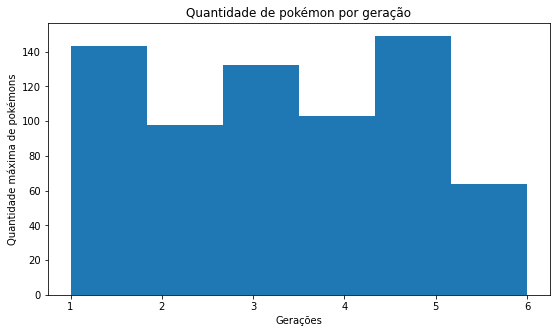

In [ ]:
#Histograma com a quantidade de pokémons pra cada geração, para comparar a visualização com o gráfico de barras acima
plt.figure(figsize=(9,5))
plt.xlabel('Gerações')
plt.ylabel('Quantidade máxima de pokémons')
plt.title('Quantidade de pokémon por geração')
plt.hist(poke['Generation'], bins=6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


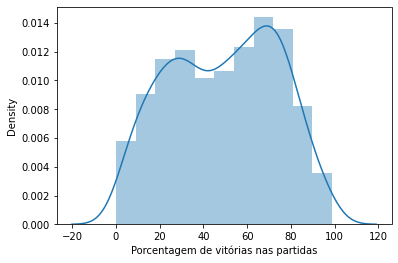

In [ ]:
#Este gráfico de distribuição mostra a porcentagem de vitória dos pokémons nas partidas e no eixo Y a média de pokémon com aquela taxa de vitória
sns.distplot(poke['% vitorias'],axlabel='Porcentagem de vitórias nas partidas')

Digite o nome do atributo para ver a média. 
Ex: Speed Defense


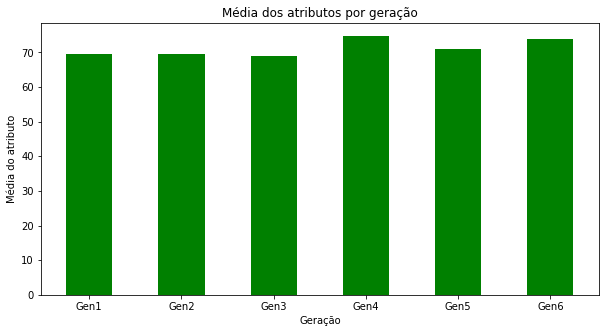

In [ ]:
#Faz um gráfico de barras sobre o atributo desejado, que pode ser derrotas, vitorias, Attack, media_movimentos etc
atributo = input("Digite o nome do atributo para ver a média. \nEx: Speed ")
media1 = poke.loc[poke['Generation'] == 1][atributo].mean()
media2 = poke.loc[poke['Generation'] == 2][atributo].mean()
media3 = poke.loc[poke['Generation'] == 3][atributo].mean()
media4 = poke.loc[poke['Generation'] == 4][atributo].mean()
media5 = poke.loc[poke['Generation'] == 5][atributo].mean()
media6 = poke.loc[poke['Generation'] == 6][atributo].mean()

eixoY = [media1,media2,media3,media4,media5,media6]
eixoX = ['Gen1','Gen2','Gen3','Gen4','Gen5','Gen6']

fig = plt.figure(figsize = (10, 5))
plt.bar(eixoX, eixoY, color ='green',
        width = 0.5)

plt.xlabel("Geração")
plt.ylabel("Média do atributo")
plt.title("Média dos atributos por geração")
plt.show()

In [ ]:
#Gráfico de dispersão mostrando a porcentagem de vitória global dos lendários/não lendários
x = poke['% vitorias']
y = poke['Legendary']
plt.scatter(x,y)
plt.title("Porcentagem de total vitórias")
plt.ylabel("Pokémon comum =0  Lendário=1")
plt.xlabel("Taxa de vitória em porcentagem")
plt.show()

In [ ]:
#Relação entre os atributos totais dos pokémons com a taxa de derrota, que é claramente inversa, ou seja, quanto maior os atributos
#totais, menor a taxa de derrota
x = poke['derrotas']
y = poke['Total']
plt.scatter(x,y)
plt.title("Total derrotas")
plt.ylabel("Soma de todos os atributos dos pokémons")
plt.xlabel("Número absoluto de derrotas")
plt.show()

In [ ]:
#Guardando na variável poke o banco de dados original novamente para remover as alterações já feitas, principalmente o preenchimento do type 2
#Para que estas alterações não afetem os próximos passos
poke = pd.read_csv('http://professor.ufabc.edu.br/~ronaldo.prati/bases/Pokemon_sim.csv', sep=',' )

In [ ]:
#Faz uma tabela a partir da soma de todas as colunas, agrupando os valores pela coluna 'Type 1'
dadosTipo1 = poke.groupby(['Type 1']).sum()
dadosTipo1 = dadosTipo1[['vitorias','derrotas','% vitorias', '% derrotas','empates']]
#Calcula a quantidade de pokémons de cada tipo e armazena na coluna 'Pokemons'
dadosTipo1['Pokemons'] = poke['Type 1'].value_counts()
#Calcula a % de vitorias e de derrotas, utilizando as colunas de 'vitorias', 'derrotas' e 'Pokemons'
dadosTipo1['% vitorias'] = dadosTipo1['% vitorias'] / dadosTipo1['Pokemons']
dadosTipo1['% derrotas'] = dadosTipo1['% derrotas'] / dadosTipo1['Pokemons']
dadosTipo1


,vitorias,derrotas,% vitorias,% derrotas,empates,Pokemons
Type 1,,,,,,
Bug,1707610.0,2715434.0,38.605761,61.390713,156.0,57
Dark,1102354.0,1070445.0,50.734260,49.265694,1.0,28
Dragon,1217756.0,567026.0,68.229269,31.769722,18.0,23
Electric,1187557.0,1528438.0,43.724485,56.275331,5.0,35
Fairy,641503.0,600094.0,51.667445,48.332313,3.0,16
Fighting,981800.0,958193.0,50.608247,49.391392,7.0,25
Fire,1793941.0,1698037.0,51.372881,48.626489,22.0,45
Flying,68801.0,86399.0,44.330541,55.669459,0.0,2
Ghost,822262.0,718131.0,52.980799,46.271327,11607.0,20


In [ ]:
#Faz uma tabela a partir da soma de todas as colunas, agrupando os valores pela coluna 'Type 2'
dadosTipo2 = poke.groupby(['Type 2']).sum()
dadosTipo2 = dadosTipo2[['vitorias','derrotas','% vitorias', '% derrotas','empates']]
#Calcula a quantidade de pokémons de cada tipo e armazena na coluna 'Pokemons'
dadosTipo2['Pokemons'] = poke['Type 2'].value_counts()
#Calcula a % de vitorias e de derrotas, utilizando as colunas de 'vitorias', 'derrotas' e 'Pokemons'
dadosTipo2['% vitorias'] = dadosTipo2['% vitorias'] / dadosTipo2['Pokemons']
dadosTipo2['% derrotas'] = dadosTipo2['% derrotas'] / dadosTipo2['Pokemons']
dadosTipo2

,vitorias,derrotas,% vitorias,% derrotas,empates,Pokemons
Type 2,,,,,,
Bug,102086.0,130714.0,43.851375,56.148625,0.0,3
Dark,698519.0,543078.0,56.259584,43.740174,3.0,16
Dragon,619123.0,389677.0,61.372224,38.627776,0.0,13
Electric,253016.0,212578.0,54.341924,45.656787,6.0,6
Fairy,485014.0,755953.0,39.063628,60.885390,633.0,16
Fighting,898352.0,498441.0,64.315006,35.684493,7.0,18
Fire,426856.0,270797.0,61.119129,38.773912,747.0,9
Flying,3165738.0,3273461.0,49.151317,50.823826,1601.0,83
Ghost,326675.0,449301.0,42.097294,57.899613,24.0,10


In [ ]:
#Faz a soma de uma tabela com a outra e calcula a % de vitorias e de derrotas para cada tipo.
dadosTipos = dadosTipo1.add(dadosTipo2)
dadosTipos.index.names = ['Type']
dadosTipos['% vitorias'] = (dadosTipos['vitorias'] / (dadosTipos['vitorias'] + dadosTipos['derrotas'] + dadosTipos['empates'])) * 100
dadosTipos['% derrotas'] = (dadosTipos['derrotas'] / (dadosTipos['vitorias'] + dadosTipos['derrotas'] + dadosTipos['empates'])) * 100
dadosTipos

,vitorias,derrotas,% vitorias,% derrotas,empates,Pokemons
Type,,,,,,
Bug,1809696.0,2846148.0,38.868041,61.128608,156.0,60
Dark,1800873.0,1613523.0,52.743469,47.256414,4.0,44
Dragon,1836879.0,956703.0,65.753114,34.246241,18.0,36
Electric,1440573.0,1741016.0,45.278256,54.721398,11.0,41
Fairy,1126517.0,1356047.0,45.365536,54.608851,636.0,32
Fighting,1880152.0,1456634.0,56.345960,43.653620,14.0,43
Fire,2220797.0,1968834.0,52.997256,46.984393,769.0,54
Flying,3234539.0,3359860.0,49.037887,50.937841,1601.0,85
Ghost,1148937.0,1167432.0,49.352964,50.147423,11631.0,30


In [ ]:
#Cria uma nova coluna na tabela com as médias de vitórias por pokémon de cada tipo.
dadosTipos['Media Vitorias'] = dadosTipos['vitorias'] / dadosTipos['Pokemons']
dadosTipos

,vitorias,derrotas,% vitorias,% derrotas,empates,Pokemons,Media Vitorias
Type,,,,,,,
Bug,1809696.0,2846148.0,38.868041,61.128608,156.0,60,30161.600000
Dark,1800873.0,1613523.0,52.743469,47.256414,4.0,44,40928.931818
Dragon,1836879.0,956703.0,65.753114,34.246241,18.0,36,51024.416667
Electric,1440573.0,1741016.0,45.278256,54.721398,11.0,41,35135.926829
Fairy,1126517.0,1356047.0,45.365536,54.608851,636.0,32,35203.656250
Fighting,1880152.0,1456634.0,56.345960,43.653620,14.0,43,43724.465116
Fire,2220797.0,1968834.0,52.997256,46.984393,769.0,54,41125.870370
Flying,3234539.0,3359860.0,49.037887,50.937841,1601.0,85,38053.400000
Ghost,1148937.0,1167432.0,49.352964,50.147423,11631.0,30,38297.900000


In [ ]:
#Cria uma tabela que contém apenas o tipo do pokémon e a média de vitórias por pokémon para aquele tipo.
tiposVitorias = dadosTipos[['Media Vitorias']]
tiposVitorias


,Media Vitorias
Type,
Bug,30161.600000
Dark,40928.931818
Dragon,51024.416667
Electric,35135.926829
Fairy,35203.656250
Fighting,43724.465116
Fire,41125.870370
Flying,38053.400000
Ghost,38297.900000


In [ ]:
#Normatiza os valores da quantidade de médias de vitórias por pokémon, para que o valor fique entre 1 e 0.
tiposVitoriasNormatizado = tiposVitorias
tiposVitoriasNormatizado['Media Vitorias'] = tiposVitoriasNormatizado['Media Vitorias'] / np.max(tiposVitoriasNormatizado['Media Vitorias'])
tiposVitoriasNormatizado

<ipython-input-28-240bb92e3d88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiposVitoriasNormatizado['Media Vitorias'] = tiposVitoriasNormatizado['Media Vitorias'] / np.max(tiposVitoriasNormatizado['Media Vitorias'])


,Media Vitorias
Type,
Bug,0.591121
Dark,0.802144
Dragon,1.000000
Electric,0.688610
Fairy,0.689937
Fighting,0.856932
Fire,0.806004
Flying,0.745788
Ghost,0.750580


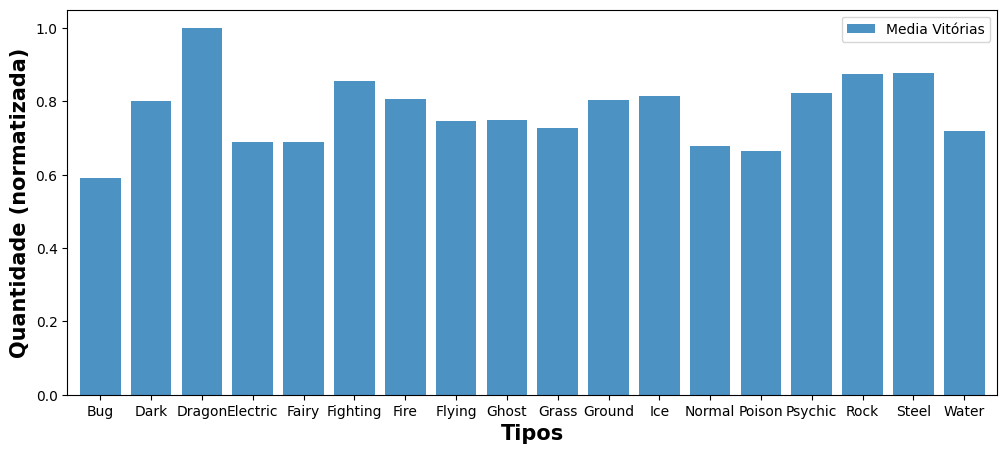

In [ ]:
#Faz um gráfico de barras representando a quantidade da média de vitórias por Pokémon de cada tipo.
tiposVitoriasNormatizado_plot = tiposVitoriasNormatizado.plot(kind='bar',
                                               figsize=(12, 5),
                                               width=0.8,
                                               rot=0,
                                               alpha=0.8)

tiposVitoriasNormatizado_plot.set_ylabel('Quantidade (normatizada)',
                                fontsize=15,
                                weight='bold')

tiposVitoriasNormatizado_plot.set_xlabel('Tipos',
                                fontsize=15,
                                weight='bold')

tiposVitoriasNormatizado_plot.set_xticklabels(['Bug', 'Dark', 'Dragon', 'Electric',
                                      'Fairy', 'Fighting', 'Fire', 'Flying',
                                      'Ghost', 'Grass', 'Ground', 'Ice', 'Normal','Poison','Psychic','Rock','Steel','Water'])

L=plt.legend()
L.get_texts()[0].set_text('Media Vitórias')

figure = tiposVitoriasNormatizado_plot.get_figure()


In [ ]:
#Este heatmap mostra a correlação entre os atributos dos pokémons, mas agora com cores
sns.heatmap(poke.corr())
